In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [266]:
train =pd.read_csv("train.csv")
test =pd.read_csv("test.csv")

In [267]:
train_test=pd.concat([train,test],axis=0,sort=False)
train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [268]:
pd.set_option('display.max_rows', 5000)
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_tes_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_tes_info

,Count of NaN,DataTypes
Id,0,int64
MSSubClass,0,int64
MSZoning,4,object
LotFrontage,486,float64
LotArea,0,int64
Street,0,object
Alley,2721,object
LotShape,0,object
LandContour,0,object
Utilities,2,object


In [269]:
g = {str(k): list(v) for k,v in train_test.groupby(train_test.dtypes, axis=1)}
g

{'int64': ['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold'],
 'float64': ['LotFrontage',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'SalePrice'],
 'object': ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFi

In [270]:
numeric=['LotFrontage','GarageCars','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath']
categorical = ['KitchenQual','Exterior1st','SaleType','Exterior2nd','Functional','Utilities','MSZoning']
for i in categorical:
    train_test[i].fillna(train_test[i].value_counts().to_frame().index[0], inplace=True)
for i in numeric:
    train_test[i].fillna(train_test[i].mean(),inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


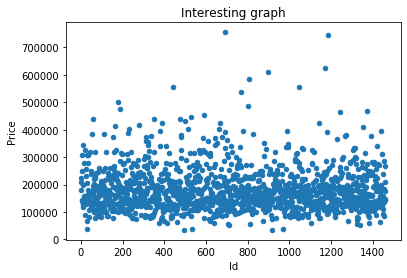

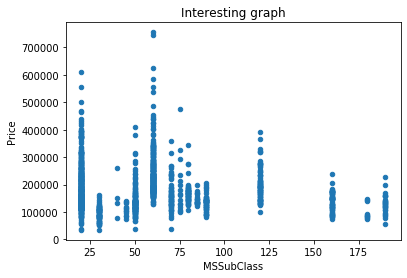

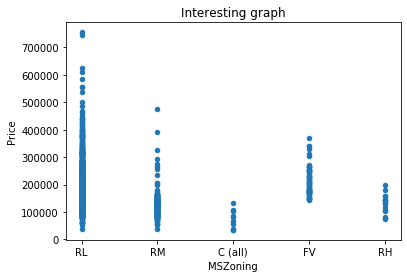

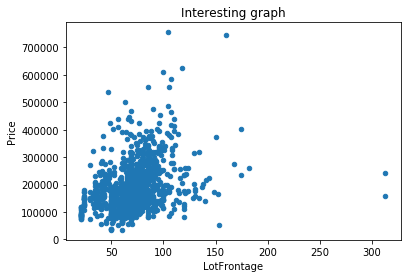

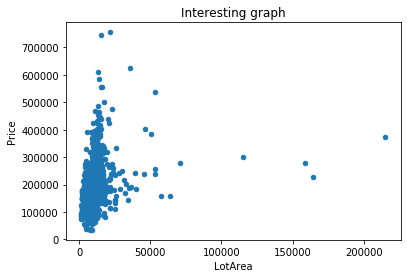

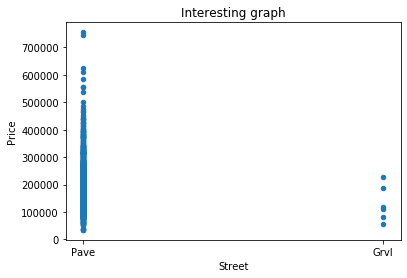

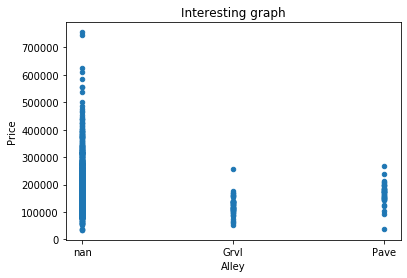

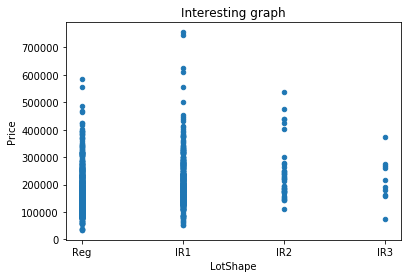

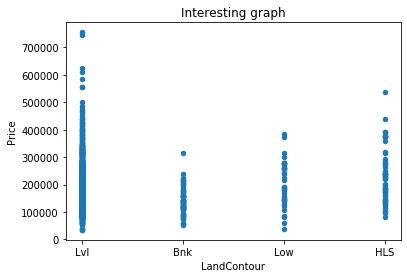

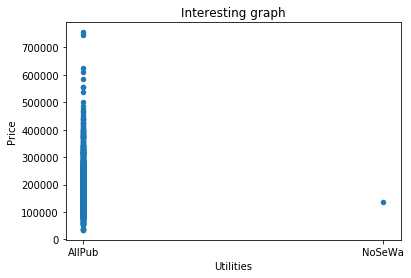

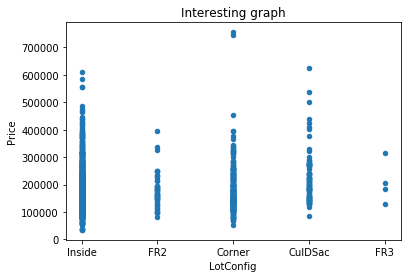

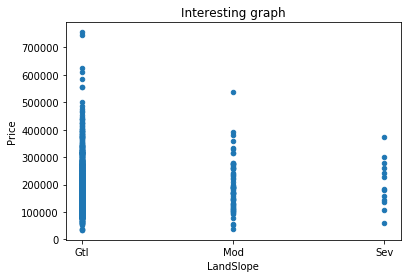

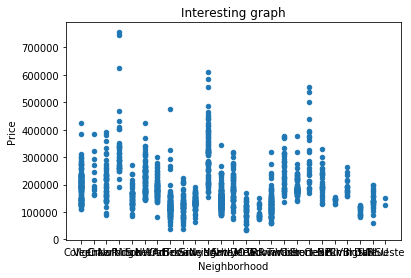

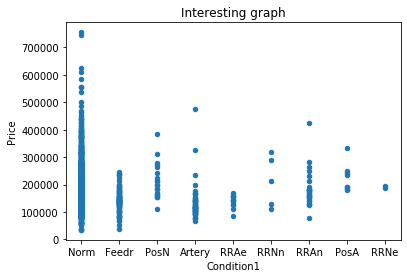

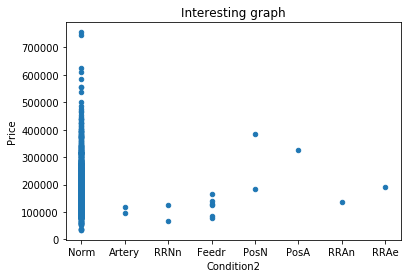

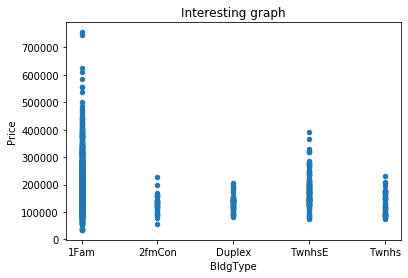

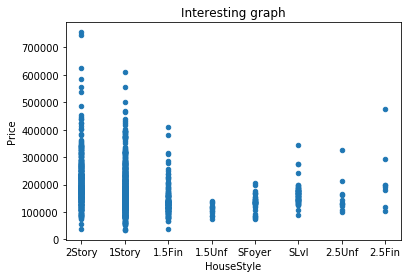

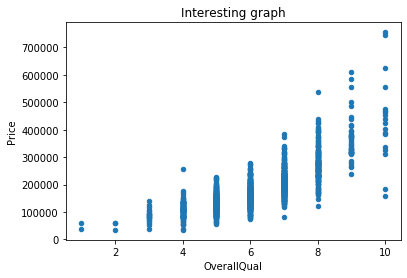

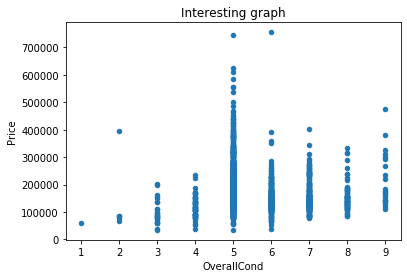

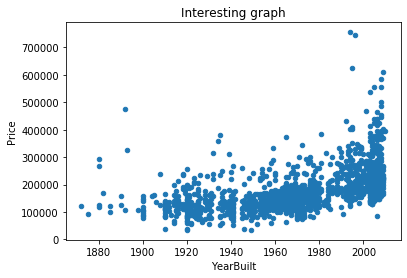

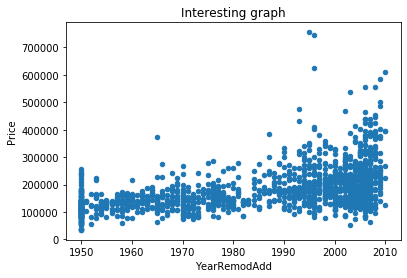

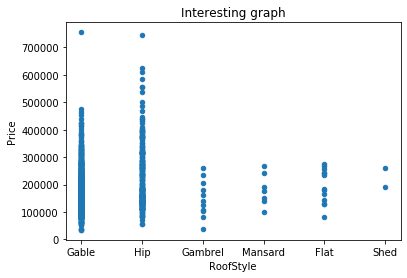

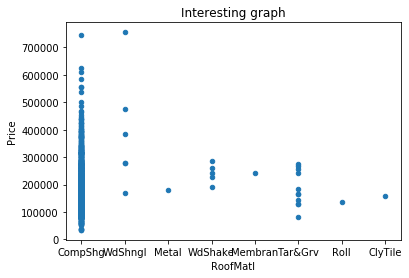

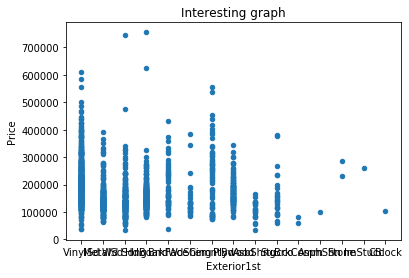

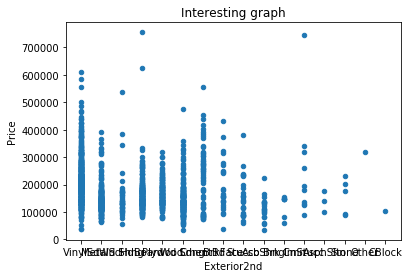

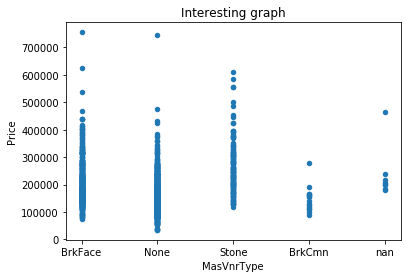

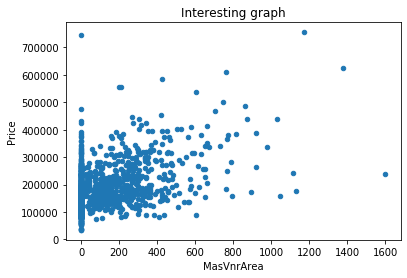

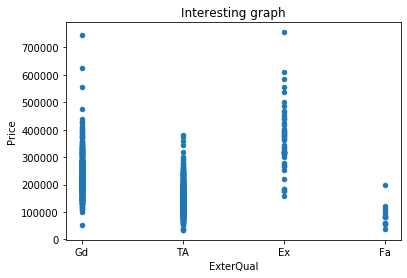

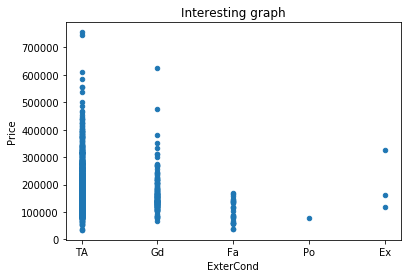

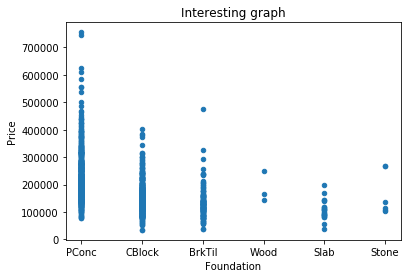

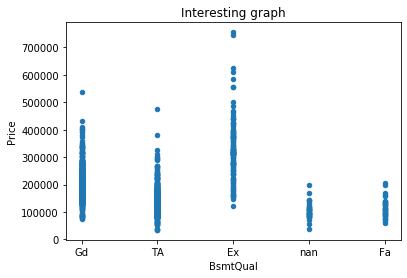

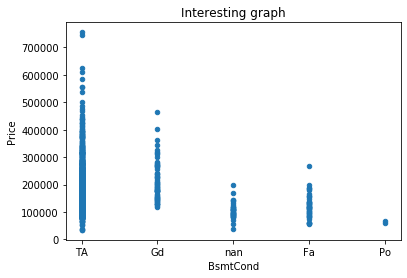

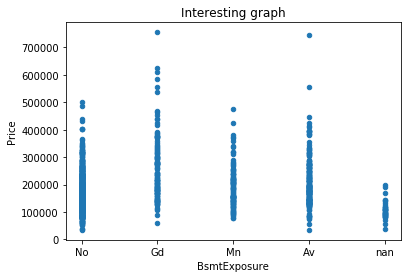

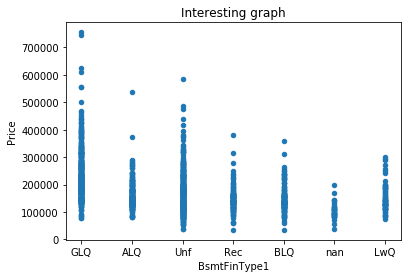

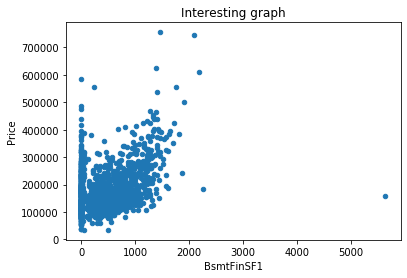

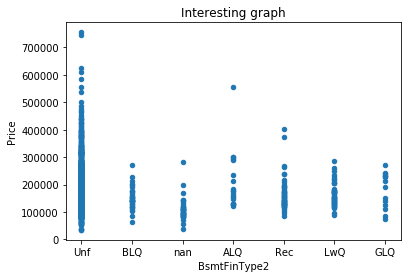

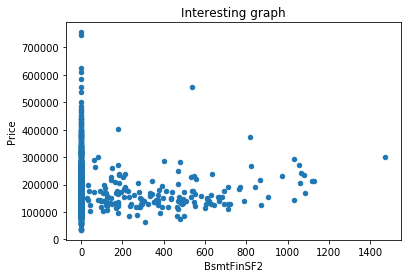

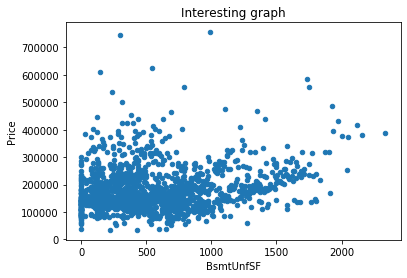

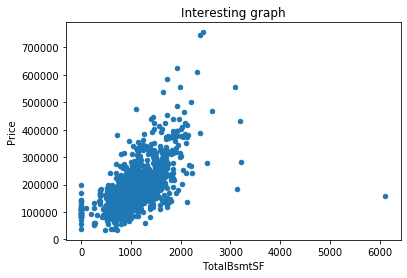

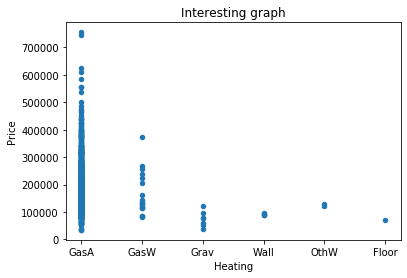

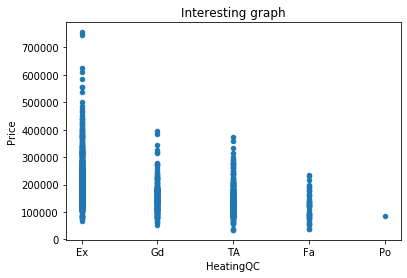

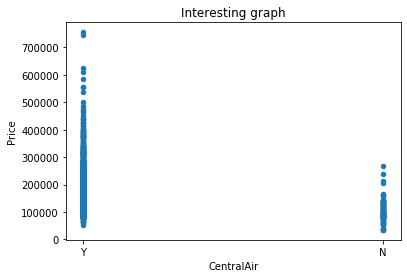

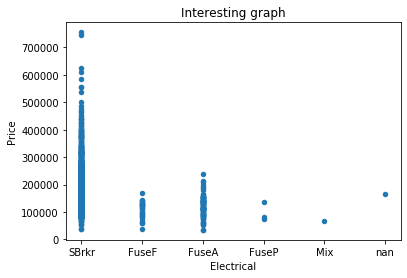

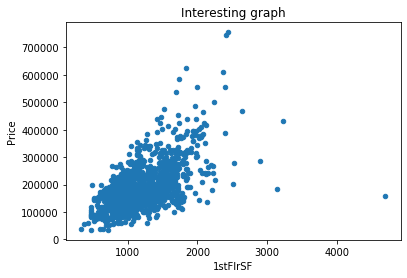

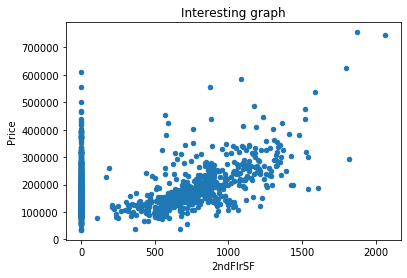

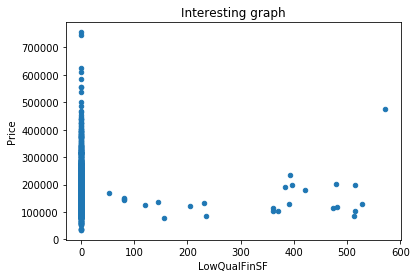

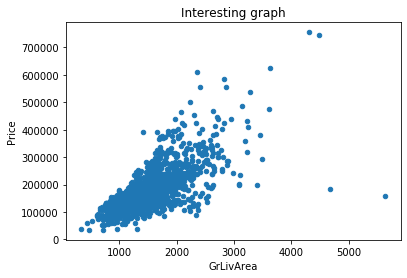

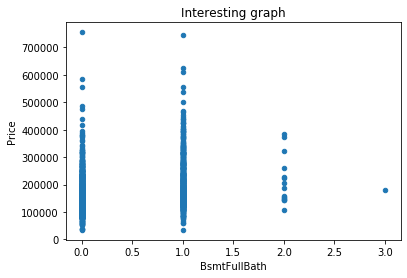

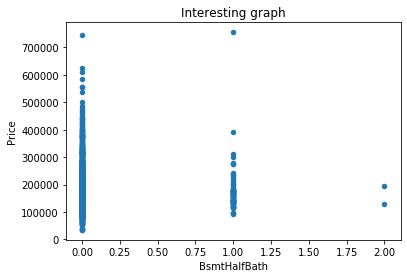

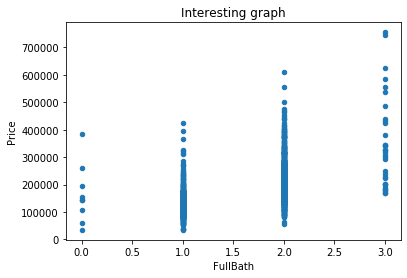

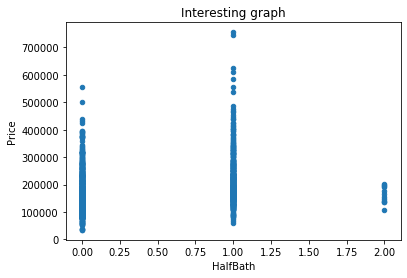

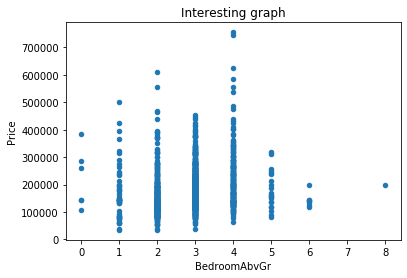

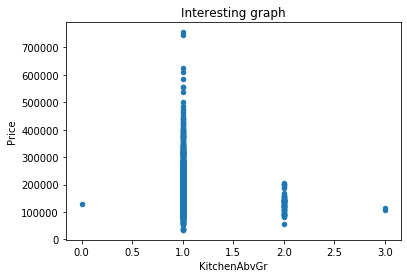

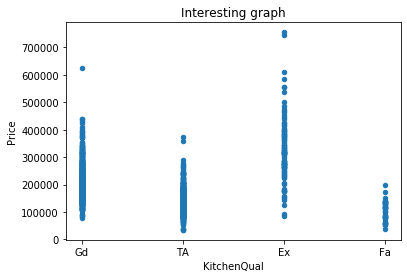

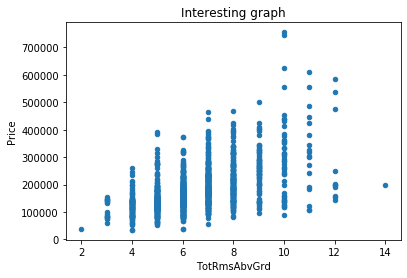

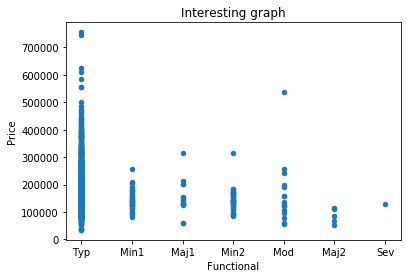

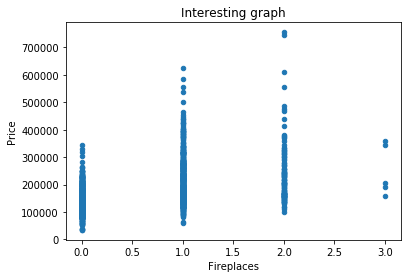

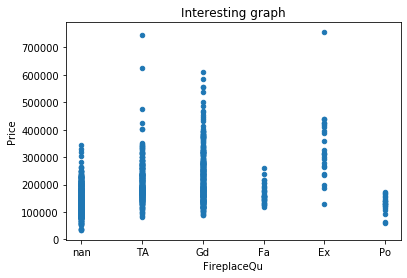

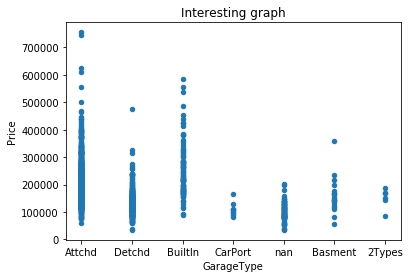

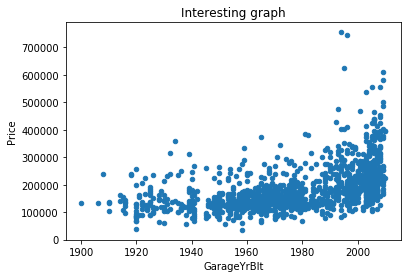

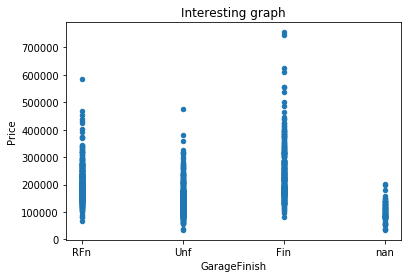

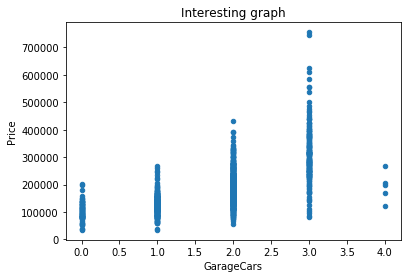

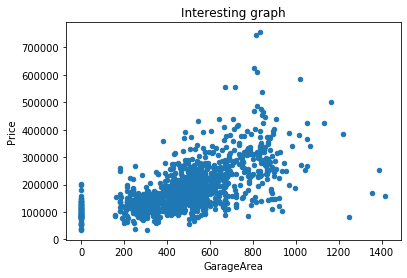

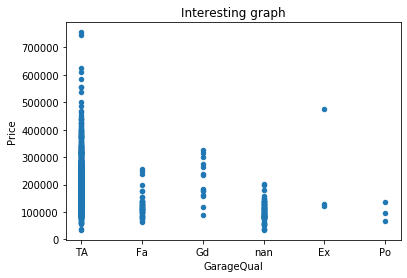

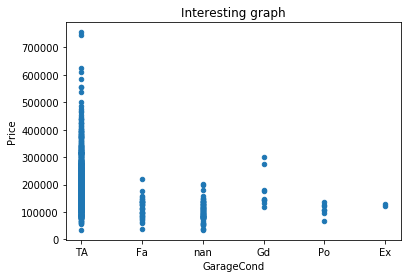

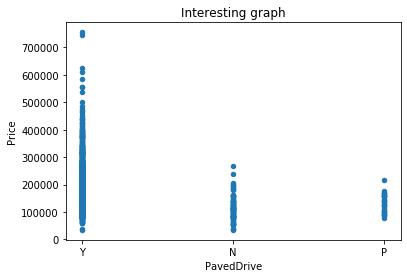

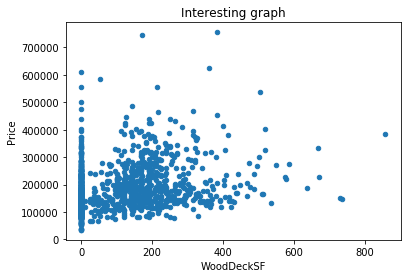

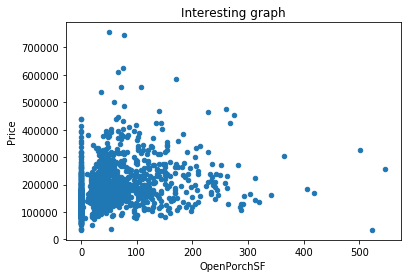

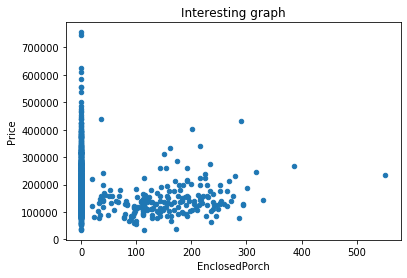

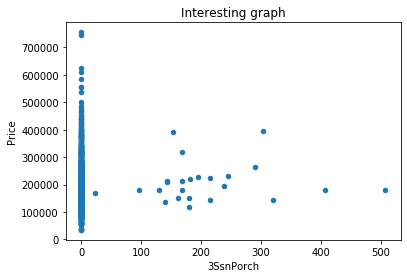

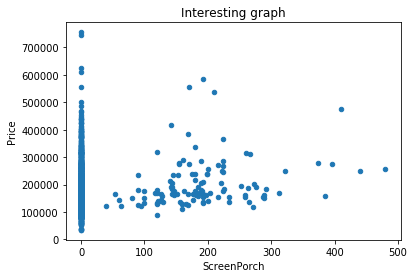

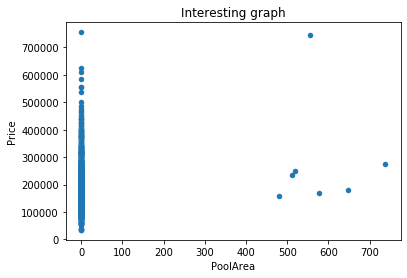

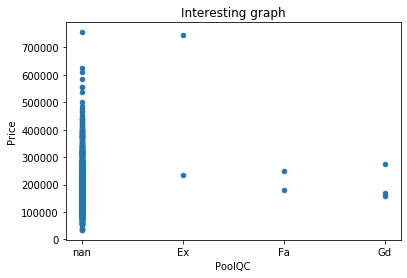

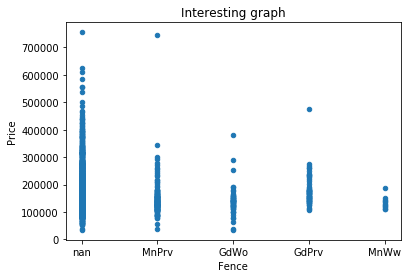

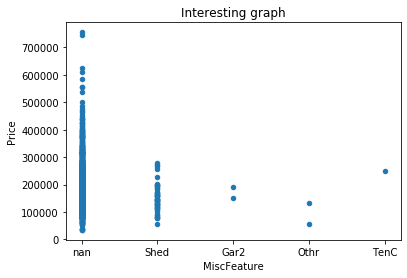

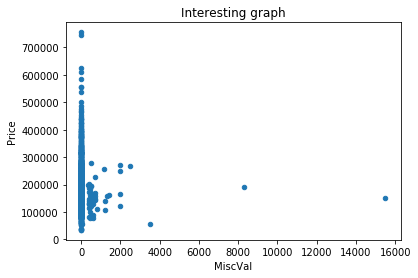

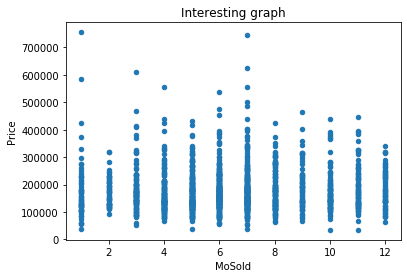

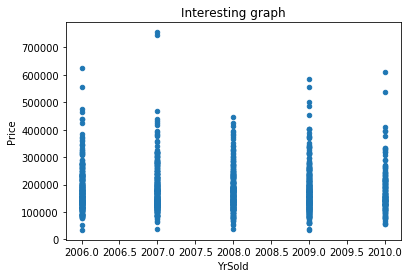

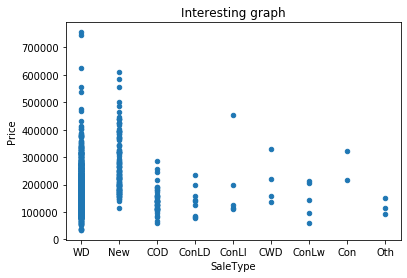

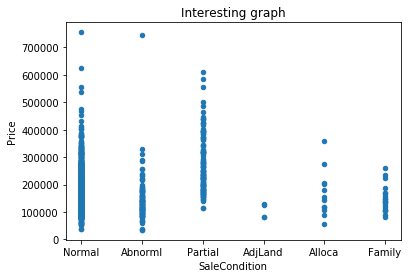

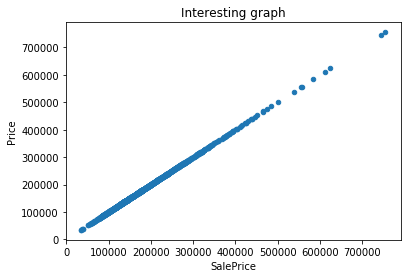

In [277]:
for i in range(81):    
    if train_test[train_test.columns[i]].dtype=='O':
        train_test[train_test.columns[i]]=train_test[train_test.columns[i]].astype(str)
    train_test.plot(kind='scatter',x=train_test.columns[i],y='SalePrice')
    plt.xlabel(train_test.columns[i])
    plt.ylabel('Price')
    plt.title('Interesting graph')

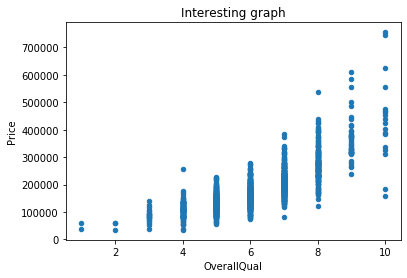

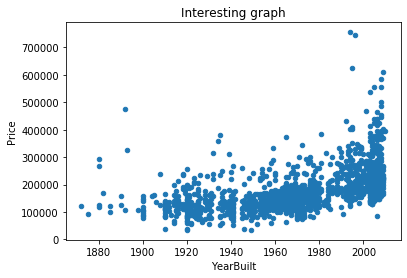

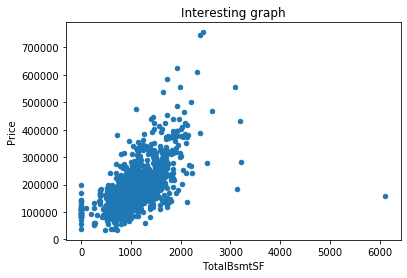

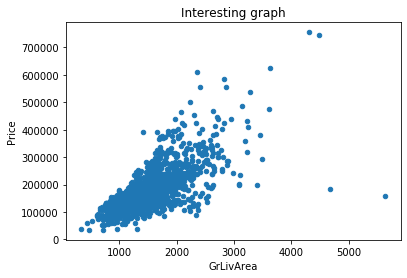

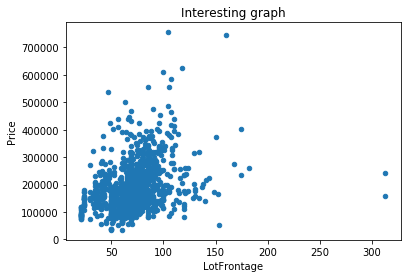

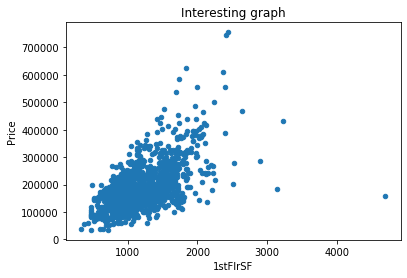

In [272]:
relevant_fields=['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','LotFrontage','1stFlrSF']
for i in relevant_fields:
    train_test.plot(kind='scatter',x=i,y='SalePrice')
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title('Interesting graph')

In [273]:
train=train_test[0:1460]
test=train_test[1460:2919]

In [274]:
train_y = train.SalePrice
predictor_cols = ['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','LotFrontage','1stFlrSF']

# Create training predictors data
train_X = train[predictor_cols]

my_model = linear_model.LinearRegression()
my_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [275]:
test_X = test[predictor_cols]
# Use the model to make predictions
predicted_prices = my_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[113048.50206104 172702.41936758 166440.2591355  ... 149015.23226555
 130080.78004569 231620.61921156]


In [276]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)